In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df1 = pd.read_csv('train_boston.csv')
#df1.head()

In [4]:
df1.shape

(17276, 22)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           17276 non-null  int64  
 1    id             17276 non-null  int64  
 2    data           17276 non-null  object 
 3    bedrooms       17276 non-null  int64  
 4    bathrooms      17276 non-null  float64
 5    sqft_living    17276 non-null  int64  
 6    sqft_lot       17276 non-null  int64  
 7    floors         17276 non-null  float64
 8    waterfront     17276 non-null  int64  
 9    view           17276 non-null  int64  
 10   condition      17276 non-null  int64  
 11   grade          17276 non-null  int64  
 12   sqft_above     17276 non-null  int64  
 13   sqft_basement  17276 non-null  int64  
 14   yr_built       17276 non-null  int64  
 15   yr_renovated   17276 non-null  int64  
 16   zip_code       17276 non-null  int64  
 17   lat            17276 non-null 

In [6]:
df1.columns = [column.replace(' ', '') for column in df1.columns]
df1.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [7]:
df1.head()

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,3,9,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,4,7,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,5,6,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


In [8]:
for col in df1.columns:
    print(col, ':', len(df1[col].value_counts()))

index : 17276
id : 17157
data : 370
bedrooms : 12
bathrooms : 29
sqft_living : 933
sqft_lot : 8425
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 846
sqft_basement : 292
yr_built : 116
yr_renovated : 68
zip_code : 70
lat : 4856
lon : 729
sqft_living15 : 715
sqft_lot15 : 7635
price : 3197


In [9]:
df1['yr_sold'] = pd.DatetimeIndex(df1['data']).year
#df1['yr_sold']

In [10]:
def years(x):
    if x['yr_renovated'] == 0:
        return x['yr_sold']-x['yr_built']
    else:
        return x['yr_sold']-x['yr_renovated']
df1['yrs_until_sold']=df1.apply(years, axis=1)
df1.head()

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price,yr_sold,yrs_until_sold
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,3,9,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000,2014,7
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500,2014,2
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000,2015,25
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,4,7,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000,2015,99
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,5,6,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950,2014,72


In [11]:
df1['yrs_until_sold']=df1['yr_sold']-df1['yr_built']
df1['yrs_until_sold']

0          7
1         54
2         63
3         99
4         72
        ... 
17271     52
17272      7
17273    106
17274     64
17275     67
Name: yrs_until_sold, Length: 17276, dtype: int64

In [12]:
df1['data'] = pd.to_datetime(df1['data'])

In [13]:
df1['bathrooms'].unique()

array([1.5 , 2.75, 1.  , 3.5 , 2.5 , 1.75, 2.  , 3.  , 3.25, 2.25, 0.75,
       5.  , 4.75, 4.25, 4.5 , 3.75, 4.  , 1.25, 5.5 , 6.  , 5.25, 6.5 ,
       6.75, 0.5 , 5.75, 8.  , 7.5 , 7.75, 6.25])

In [14]:
df1['floors'].unique()

array([2. , 1. , 1.5, 3. , 2.5, 3.5])

In [15]:
print('number of unique values:', '\n')
for col in df1.select_dtypes(np.number).columns:
    print(col, ':', len(df1[col].unique()))

number of unique values: 

index : 17276
id : 17157
bedrooms : 12
bathrooms : 29
sqft_living : 933
sqft_lot : 8425
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 846
sqft_basement : 292
yr_built : 116
yr_renovated : 68
zip_code : 70
lat : 4856
lon : 729
sqft_living15 : 715
sqft_lot15 : 7635
price : 3197
yr_sold : 2
yrs_until_sold : 117


In [16]:
df1['zip_code'] = df1['zip_code'].astype('object')

In [17]:
df1['waterfront'] = df1['waterfront'].astype('object')

In [18]:
df1['view'] = df1['view'].astype('object')

In [19]:
len(df1['index'].unique()), len(df1['id'].unique())

(17276, 17157)

So index is unique for each entry, but id isn't

In [20]:
df2 = df1.copy()

In [21]:
df2 = df2.set_index('index', drop = True)
#df2

In [22]:
df2 = df2.drop(columns = ['id', 'data', 'lat', 'lon'])
#df2

## EDA

In [23]:
import warnings
warnings.filterwarnings('ignore')

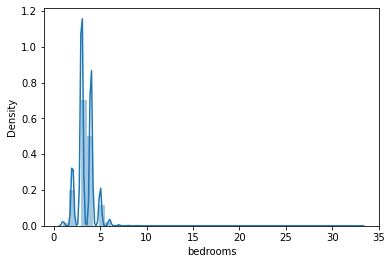

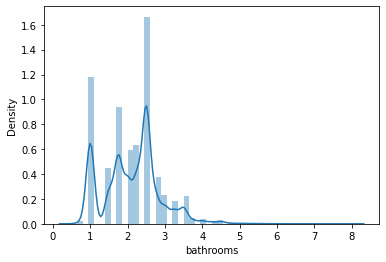

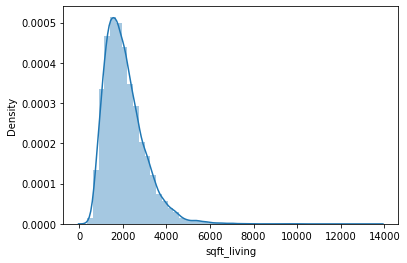

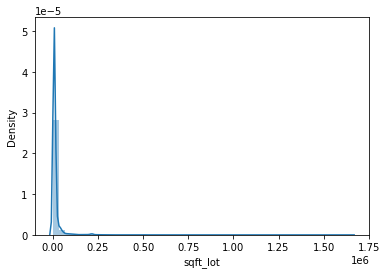

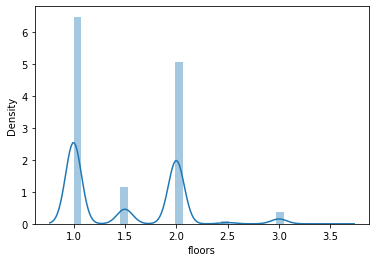

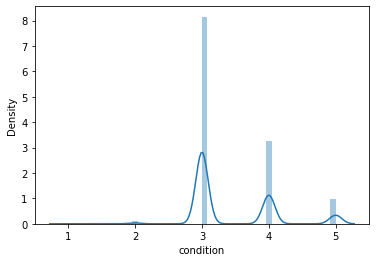

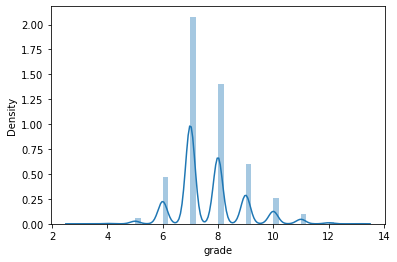

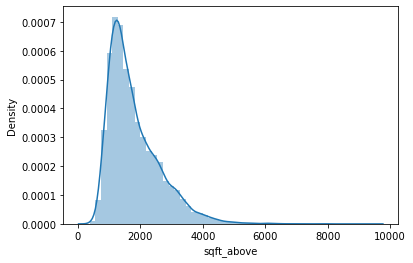

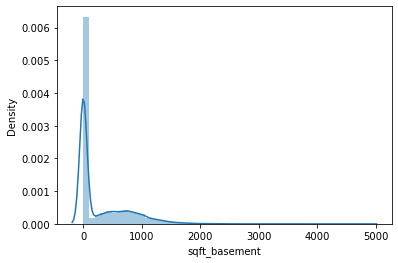

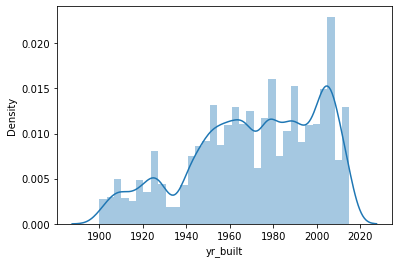

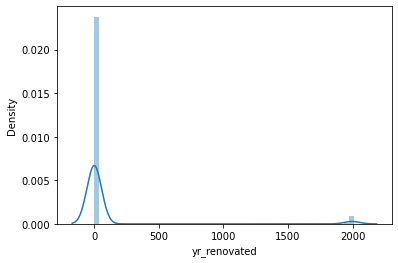

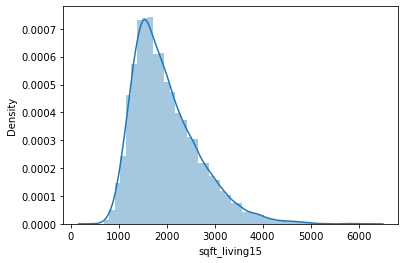

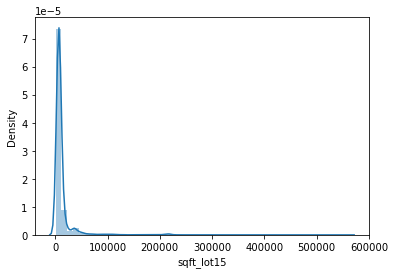

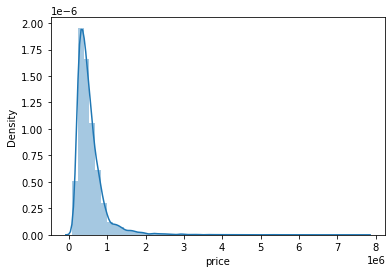

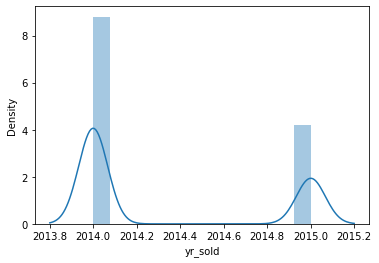

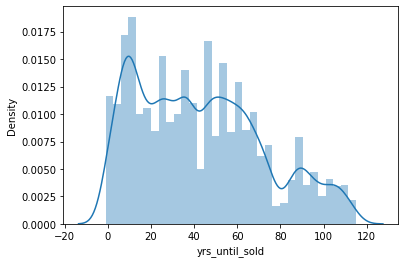

In [24]:
for col in df2.select_dtypes(np.number).columns:
    sns.distplot(df2[col])
    plt.show()

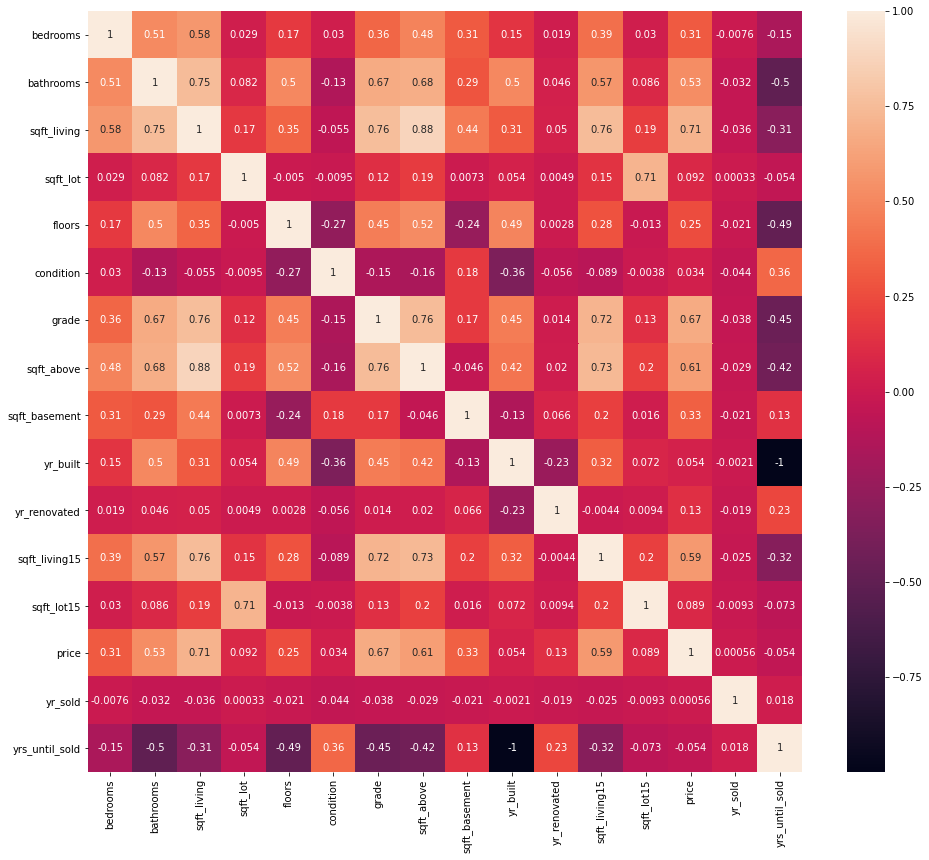

In [25]:
fig, ax = plt.subplots(figsize=(16, 14))
ax = sns.heatmap(df2.corr(), annot=True)
plt.show()

We're going to measure the time elapsed since the last time the flat was new or renovated

In [26]:
df3 = df2.copy()

In [27]:
df3_renovated = df3[df3['yr_renovated']!=0]
df3_renovated.shape

(726, 19)

In [28]:
df3_renovated['years_since_last_renovation'] = df3['yr_sold']-df3['yr_renovated']
#df3_renovated.head()

In [29]:
df3_non_renovated = df3[df3['yr_renovated']==0]
df3_non_renovated.shape

(16550, 19)

In [30]:
df3_non_renovated['years_since_last_renovation'] = df3['yr_sold']-df3['yr_built']
#df3_non_renovated.head()

In [31]:
df4 = pd.concat([df3_renovated, df3_non_renovated])
df4.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,sqft_living15,sqft_lot15,price,yr_sold,yrs_until_sold,years_since_last_renovation
index,,,,,,,,,,,,,,,,,,,,
8986,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,2290,10125,970500,2014,54,2
9419,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,1320,9385,327000,2015,63,25
18008,3,2.25,2390,4590,2.0,0,0,3,8,2090,300,1941,1998,98105,2280,5179,980000,2014,73,16
1664,5,2.00,1880,4179,1.0,0,0,3,7,940,940,1952,2000,98118,1350,5150,349950,2015,63,15
16192,4,2.00,2750,5527,2.0,0,0,3,8,2130,620,1901,1987,98119,1290,1764,865000,2015,114,28


In [32]:
df4 = df4.drop(['yr_sold'], axis=1)

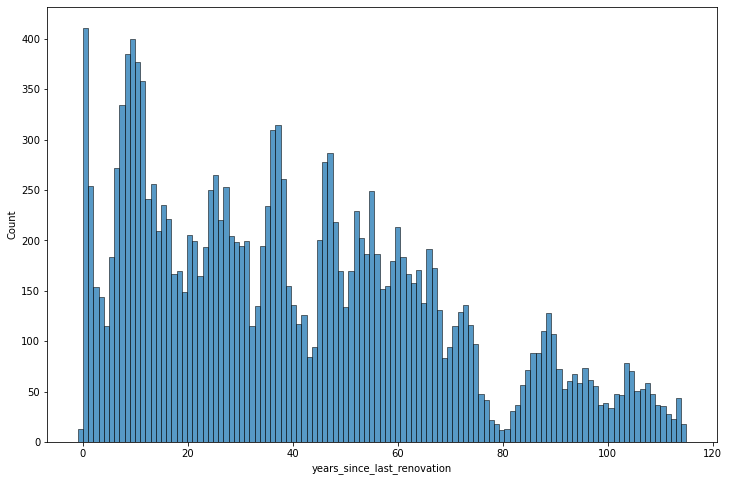

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(df4['years_since_last_renovation'], bins = len(df4['years_since_last_renovation'].unique()))
plt.show()

We can see some tendencies in construction/renovation years, e.g. very few houses were built during WWII years (~80 years before the year of the transaction, i.e. in the fourties)

In [34]:
price_corr = df4.corr()['price'].sort_values(ascending=False)
price_corr

price                          1.000000
sqft_living                    0.705890
grade                          0.668464
sqft_above                     0.607706
sqft_living15                  0.585543
bathrooms                      0.525935
sqft_basement                  0.331291
bedrooms                       0.310081
floors                         0.252224
yr_renovated                   0.128425
sqft_lot                       0.092304
sqft_lot15                     0.089045
yr_built                       0.053602
condition                      0.034459
yrs_until_sold                -0.053584
years_since_last_renovation   -0.106710
Name: price, dtype: float64

As expected, the price has a negative correlation with the number of years since it was last time 'new'. However this relative correlation is modest (-11%)

In [35]:
surface_corr = df4[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].corr()
surface_corr

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
sqft_living,1.000000,0.170122,0.876317,0.440607,0.757399,0.188757
sqft_lot,0.170122,1.000000,0.185400,0.007279,0.148390,0.713726
sqft_above,0.876317,0.185400,1.000000,-0.046342,0.734459,0.201392
sqft_basement,0.440607,0.007279,-0.046342,1.000000,0.201898,0.016117
sqft_living15,0.757399,0.148390,0.734459,0.201898,1.000000,0.201799
sqft_lot15,0.188757,0.713726,0.201392,0.016117,0.201799,1.000000


In [36]:
# This shows how tightly correlated with each other are the surface columns

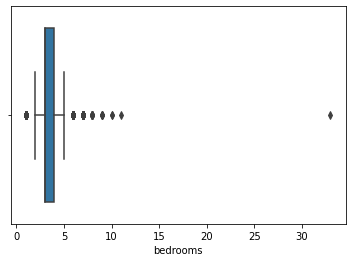

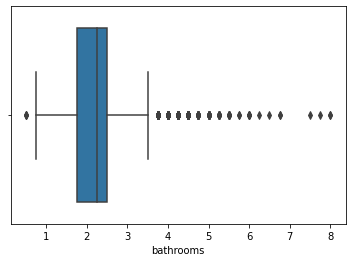

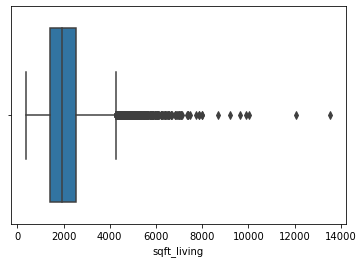

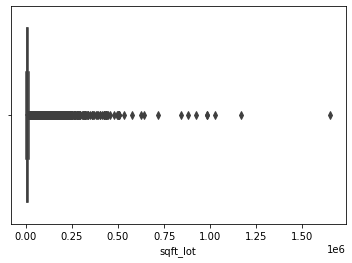

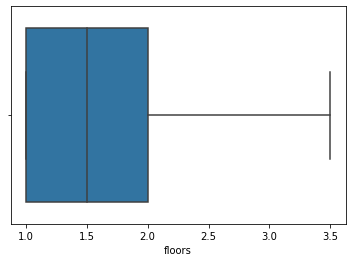

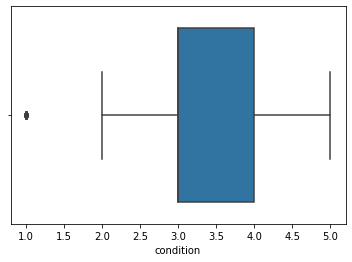

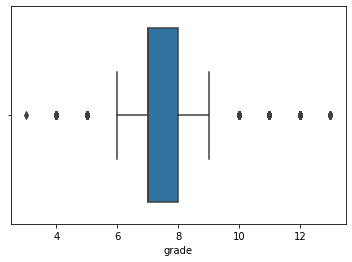

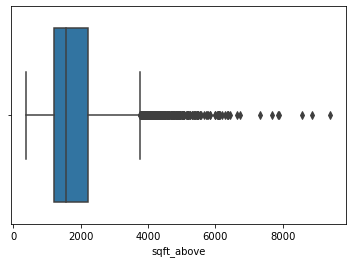

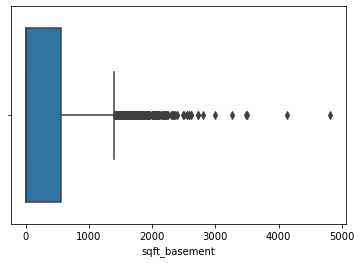

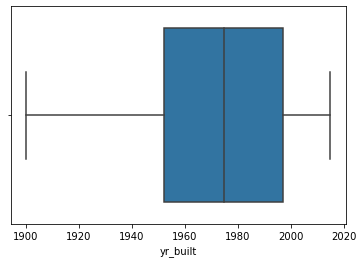

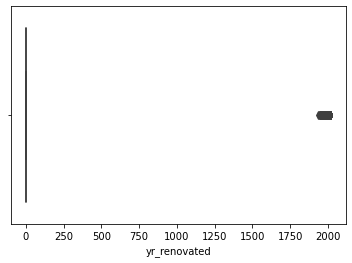

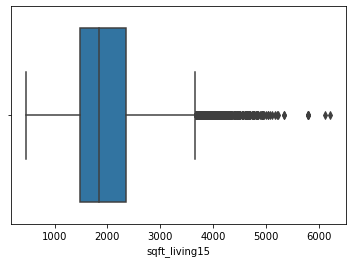

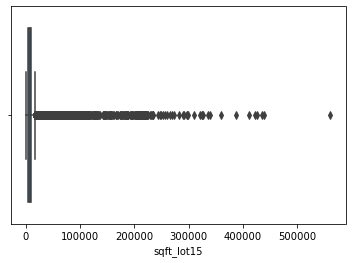

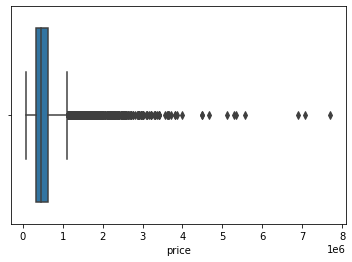

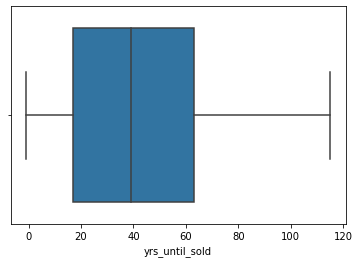

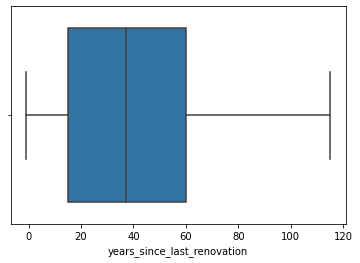

In [37]:
for col in df4.select_dtypes(np.number).columns:
    sns.boxplot(df4[col])
    plt.show()

In [38]:
df4

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,sqft_living15,sqft_lot15,price,yrs_until_sold,years_since_last_renovation
index,,,,,,,,,,,,,,,,,,,
8986,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,2290,10125,970500,54,2
9419,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,1320,9385,327000,63,25
18008,3,2.25,2390,4590,2.0,0,0,3,8,2090,300,1941,1998,98105,2280,5179,980000,73,16
1664,5,2.00,1880,4179,1.0,0,0,3,7,940,940,1952,2000,98118,1350,5150,349950,63,15
16192,4,2.00,2750,5527,2.0,0,0,3,8,2130,620,1901,1987,98119,1290,1764,865000,114,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3,2.25,1960,8875,1.0,0,0,3,7,1290,670,1965,0,98003,1890,8700,182000,49,49
21575,3,2.25,1190,1200,3.0,0,0,3,8,1190,0,2008,0,98103,1180,1224,475000,7,7
5390,6,1.75,2920,5000,2.5,0,0,4,9,2780,140,1908,0,98122,2020,5000,823000,106,106


In [39]:
df4.dtypes

bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_lot                         int64
floors                         float64
waterfront                      object
view                            object
condition                        int64
grade                            int64
sqft_above                       int64
sqft_basement                    int64
yr_built                         int64
yr_renovated                     int64
zip_code                        object
sqft_living15                    int64
sqft_lot15                       int64
price                            int64
yrs_until_sold                   int64
years_since_last_renovation      int64
dtype: object

In [40]:
df_lux = df4[df4['price'] > 650000]
df_lux.shape

(4148, 19)

In [41]:
df_bmk = df4.copy()
df_bmk = df_bmk.drop(columns = ['yrs_until_sold', 'years_since_last_renovation'], axis = 1)
df_bmk.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zip_code          object
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

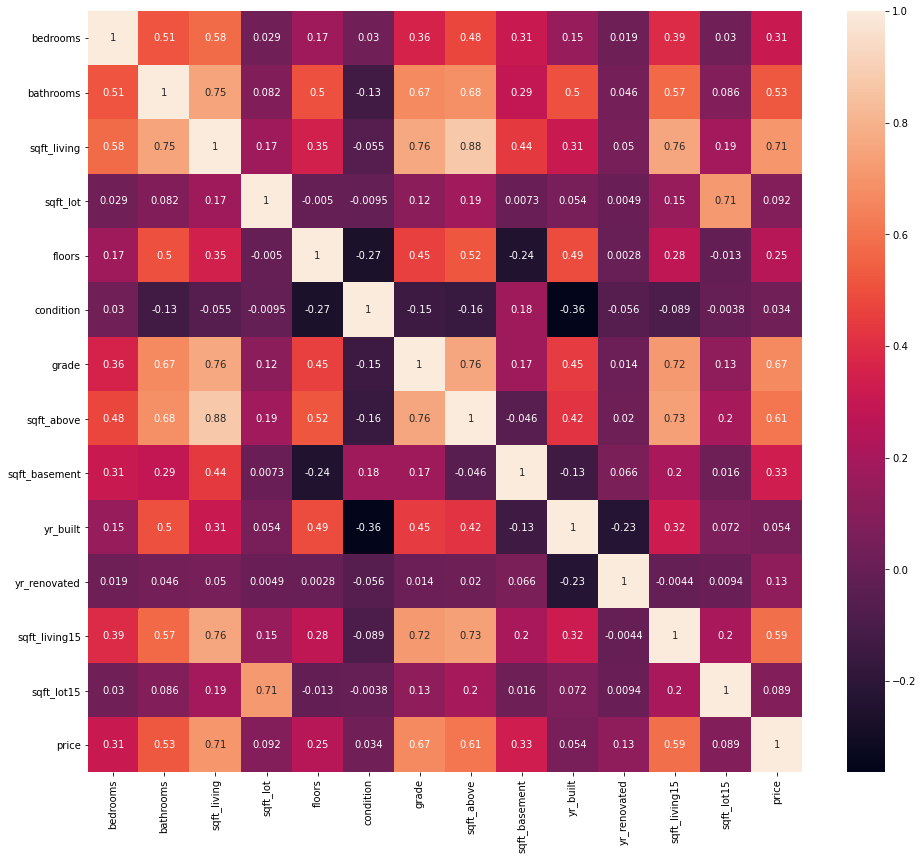

In [42]:
fig, ax = plt.subplots(figsize=(16, 14))
ax = sns.heatmap(df_bmk.corr(), annot=True)
plt.show()

encode the benchmark

In [43]:
from sklearn.preprocessing import OneHotEncoder
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), MLPRegressor(), RandomForestRegressor(), tree.DecisionTreeRegressor(), XGBRegressor()]


In [44]:
y = df_bmk['price']
X = df_bmk.drop(['price'], axis=1)

X_num=X.select_dtypes(include=np.number)
X_cat=X.select_dtypes(include=np.object)

In [45]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
X = np.concatenate((X_num, encoded), axis=1)

In [47]:
def model_selection(df_bmk, models):
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    for model in models:
        model.fit(X_train, y_train)        
        predictions = model.predict(X_test)
        print(model)
        print('R2 score:', r2_score(y_test, predictions))
        print('MAE:', mean_absolute_error(y_test, predictions))
        print('MSE:', mean_squared_error(y_test, predictions, squared=False))
        sns.regplot(y_test, predictions)
        plt.show()

LinearRegression()
R2 score: 0.7916040311778603
MAE: 94419.667738323
MSE: 164088.04915512446


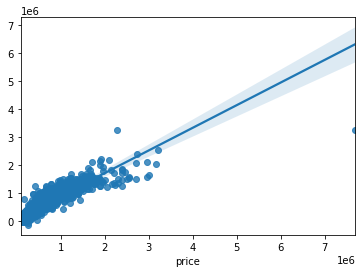

KNeighborsRegressor()
R2 score: 0.5099645247576929
MAE: 155465.35775462963
MSE: 251620.5199171324


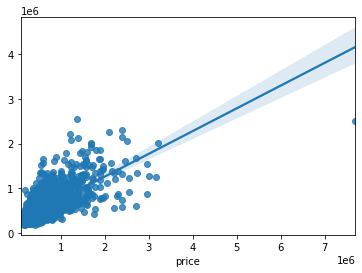

MLPRegressor()
R2 score: 0.5211788503577989
MAE: 169175.42417740248
MSE: 248724.7238413481


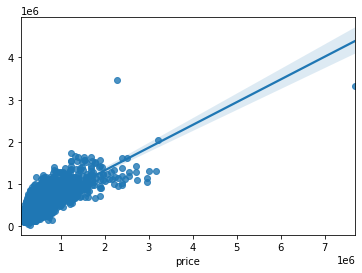

RandomForestRegressor()
R2 score: 0.8195807422070832
MAE: 83364.09472151949
MSE: 152677.0432395187


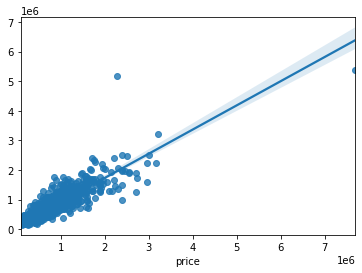

DecisionTreeRegressor()
R2 score: 0.617418890279327
MAE: 119462.703125
MSE: 222327.94618536023


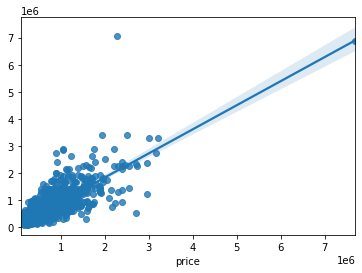

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
R2 score: 0.8700073435715661
MAE: 76207.82549144604
MSE: 129596.03193384285


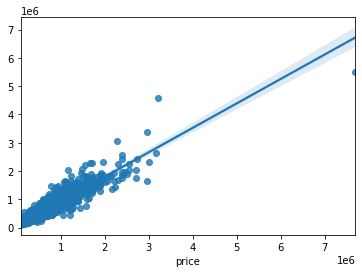

In [48]:
model_selection(df_bmk, models)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7916040311778603

In [51]:
lr_predictions = lr.predict(X_test)

In [52]:
print('R2 score:', r2_score(y_test, lr_predictions)), 
print('MAE:', mean_absolute_error(y_test, lr_predictions)) 
print('MSE:', mean_squared_error(y_test, lr_predictions, squared=False))

R2 score: 0.7916040311778603
MAE: 94419.667738323
MSE: 164088.04915512446


In [53]:
import plotly.express as px

In [54]:
fig = px.scatter(x=predictions, y=y_test, color=predictions, title="LR: Predicted/True price correlations")
fig.show()

NameError: name 'predictions' is not defined

MAE and MSE are quite wide, therefore the model may be underfit. Let's try with another model.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
knn_predictions = knn.predict(X_test)

In [ ]:
print('R2 score:', r2_score(y_test, knn_predictions)), 
print('MAE: ', mean_absolute_error(y_test, knn_predictions)) 
print('MSE:', mean_squared_error(y_test, knn_predictions, squared=False))

In [ ]:
fig = px.scatter(x=knn_predictions, y=y_test, color=knn_predictions, title="KNN: Predicted/True price correlations")
fig.show()

No idea so far what should be done to improve the model. Let's try a different model:

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

In [ ]:
rfr_predictions = rfr.predict(X_test)

In [ ]:
print('R2 score:', r2_score(y_test, rfr_predictions)), 
print('MAE: ', mean_absolute_error(y_test, rfr_predictions)) 
print('MSE:', mean_squared_error(y_test, rfr_predictions, squared=False))

In [ ]:
fig = px.scatter(x=rfr_predictions, y=y_test, color=rfr_predictions, title="RandomForest: Predicted/True price correlation")
fig.show()

In [ ]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf_predictions = clf.predict(X_test)

In [ ]:
print('R2 score:', r2_score(y_test, clf_predictions)), 
print('MAE: ', mean_absolute_error(y_test, clf_predictions)) 
print('MSE:', mean_squared_error(y_test, clf_predictions, squared=False))

In [ ]:
fig = px.scatter(x=clf_predictions, y=y_test, color=clf_predictions, title="DecisionTree: Predicted/True price correlation")
fig.show()

In [ ]:
X = df_bmk.drop(['price'], axis=1)
y = df_bmk['price']

X_num=X.select_dtypes(include=np.number)
X_cat=X.select_dtypes(include=np.object)

In [ ]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

with open('encoder.pkl', 'wb') as file:
        encoder = pickle.dump(encoder, file)

In [ ]:
X = np.concatenate((X_num, encoded), axis=1)

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

with open('model.pkl', 'wb') as file: 
    pickle.dump(model, file) 
model.score(X_test, y_test)

In [ ]:
predictions = xgb.predict(X_test)

In [ ]:
print('R2 score:', r2_score(y_test, predictions)), 
print('MAE: ', mean_absolute_error(y_test, predictions)) 
print('MSE:', mean_squared_error(y_test, predictions, squared=False))

At this point, we have a pretty solid model, even without applying 
transformations

In [ ]:
fig = px.scatter(x=predictions, y=y_test, color=predictions, title="XGB: Predicted/True price correlation")
fig.show()